# 1.0 **Operadores**

## 1.1 **Operadores aritméticos**

Para que serve?
* Servem para executar operações matemáticas
* Muito utilizados para criar colunas calculadas

### **Tipos**



```sql
 +
 -
 *
 /
 ^
 %
 || --> não é um operador aritmético é usado para concatenar strings
```



### **EXEMPLOS**

**(Exemplo 1)** Criação de coluna calculada
* Crie uma coluna contendo a idade do cliente da tabela sales.customers

**Query:**

```sql
select
	email,
	birth_date,
	(current_date - birth_date) / 365 as idade_do_cliente
from sales.customers
```
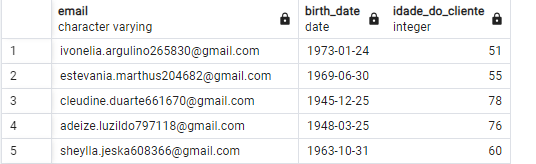

```sql
select
	email,
	birth_date,
	(current_date - birth_date) / 365 as "idade do cliente"
from sales.customers
```
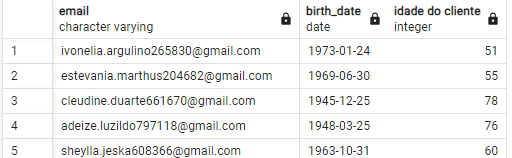

> Legal né? perba que é utilizado "" para usar o alias 'AS' e normear a coluna com espaço.

**(Exemplo 2)** Utilização da coluna calculada nas queries
* Liste os 10 clientes mais novos da tabela customers

**Query:**

```sql
select
	email,
	birth_date,
	(current_date - birth_date) / 365 as "idade do cliente"
from sales.customers
order by "idade do cliente"
```



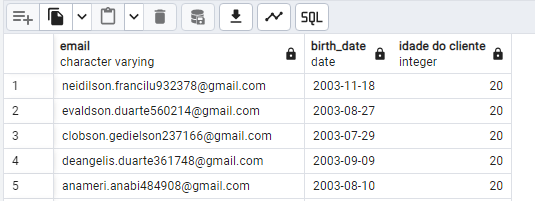

> Podemos usar o ORDER BY nessas colunas "temporarias"

**(Exemplo 3)** Criação de coluna calculada com strings
* Crie a coluna "nome_completo" contendo o nome completo do cliente
select

**Query:**

```sql
select
	first_name,
	last_name,
	first_name || ' ' || last_name as nome_completo
from sales.customers
```



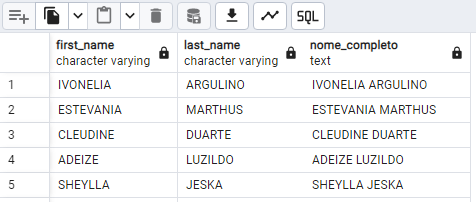

> Preferi imprimir first_name e last_name para validar a nova coluna.

### **RESUMO**

1. Servem para executar operações matemáticas
2. Muito utilizado para criar colunas calculadas
3. Alias (pseudônimos) são muito utilizados para dar nome as colunas calculadas.
4. Para criar pseudônimos que contém espaços no nome são utilizadas aspas duplas
5. No caso de strings o operador de adição (||) irá concatenar as strings
6. Utilize o Guia de comandos para consultar os operadores utilizados no SQL

## 1.2 **Operadores de comparação**

Para que serve?
* Servem para comparar dois valores retornando TRUE ou FALSE
* Muito utilizado em conjunto com a função WHERE para filtrar linhas de uma seleção

### **EXEMPLOS**

**(Exemplo 1)** Uso de operadores como flag
* Crie uma coluna que retorne TRUE sempre que um cliente for um profissional clt

**Query:**

```sql
select
    customer_id,
    first_name,
    professional_status
from sales.customers
```



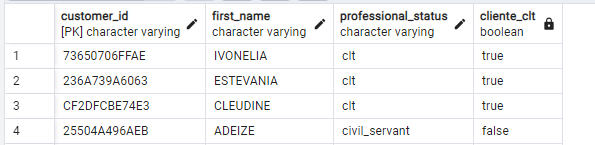

> Conseguimos criar uma coluna, que nos diz se o cliente é ou não clt, repare quem em civil_servant veio com a informação 'false'

### **RESUMO**

1. Servem para comparar dois valores retornando TRUE ou FALSE
2. Muito utilizado em conjunto com a função WHERE para filtrar linhas de uma
seleção
3. Utilizados para criar colunas Flag que retornem TRUE ou FALSE


## 1.3 **Operadores lógicos**

Para que serve?
* Usados para unir expressões simples em uma composta

### **Tipos**



```sql
  AND
  OR
  NOT
  BETWEEN
  IN
  LIKE
  ILIKE
  IS NULL
```



### **EXEMPLOS**

**(Exemplo 1)** Uso do comando BETWEEN
* Selecione veículos que custam entre 100k e 200k na tabela products

**query:**

```sql
select *
from sales.products
where price >= 100000 and price <= 200000
```
```sql
select *
from sales.products
where price between 100000 and 200000
```


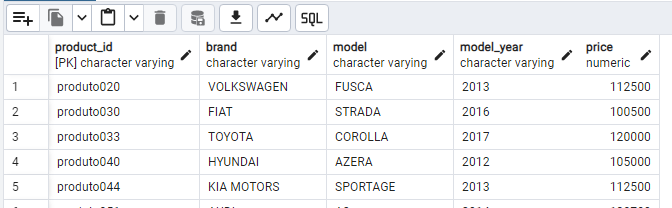

> Observe que user os operadores aritmeticos ou logicos, conseguimos o mesmo resultado.

**(Exemplo 2)**  Uso do comando NOT
* Selecione veículos que custam abaixo de 100k ou acima 200k

**Query:**

```sql
select *
from sales.products
where price < 100000 or price > 200000
```
```sql
select *
from sales.products
where price not between 100000 and 200000
```



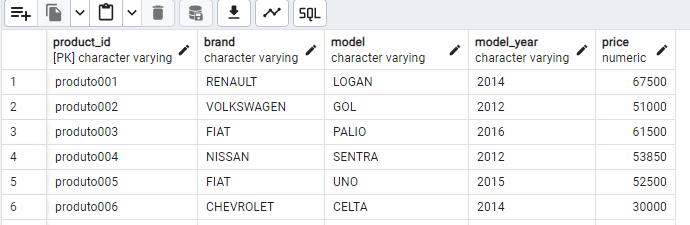

> Verifique que aconteceu a mesma coisa, conseguimos o mesmo resultado utilizando operadores aritmeticos ou logicos.

**(Exemplo 3)** Uso do comando IN
* Selecionar produtos que sejam da marca HONDA, TOYOTA ou RENAULT

**Query:**

```sql
select *
from sales.products
where brand = 'HONDA' or brand = 'TOYOTA' or brand = 'RENAULT'
```
```sql
select *
from sales.products
where brand in ('HONDA', 'TOYOTA', 'RENAULT')
```


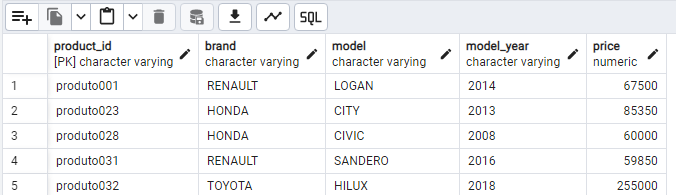

> Mesma situação, bacana né?

**(Exemplo 4)** Uso do comando LIKE *(matchs imperfeitos)*
* Selecione os primeiros nomes distintos da tabela customers que começam com as iniciais ANA

**Query:**

```sql
select distinct first_name
from sales.customers
where first_name = 'ANA'
```
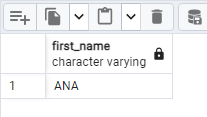
```sql
select distinct first_name
from sales.customers
where first_name like 'ANA%'
```




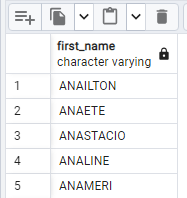

> Aqui foi diferente, não conseguimos ter o mesmo resultado sem utilizar a clausula LIKE

**(Exemplo 5)** Uso do comando ILIKE (ignora letras maiúsculas e minúsculas)
* Selecione os primeiros nomes distintos com iniciais 'ana'

**Query:**

```sql
select distinct first_name
from sales.customers
where first_name like 'ana%'
```
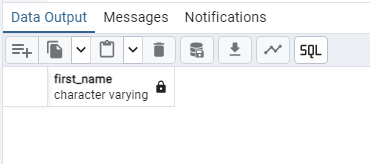



> Utilizando a clausa like fazendo a pesquisar com letras minusculas retornou tudo vazio, pois nosso banco de dados não possuiu nome com letras minusculas, como fugir desse problema? ulitizando a clausula ILIKE

**Query:**

```sql
select distinct first_name
from sales.customers
where first_name ilike 'ana%'
```



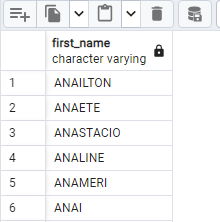

> Agora sim! retornou perfeitamente.

**(Exemplo 6)** Uso do comando IS NULL
* Selecionar apenas as linhas que contém nulo no campo "population" na tabela temp_tables.regions

**Query:**

```sql
select *
from temp_tables.regions
where population is null
```



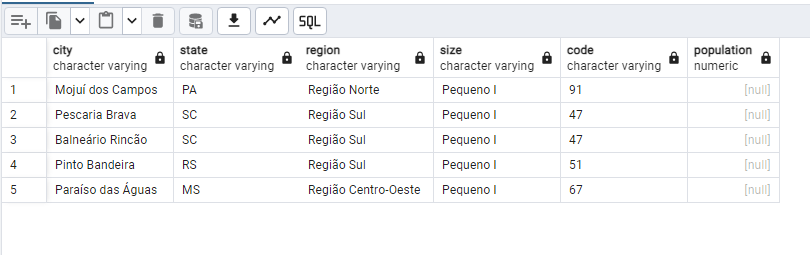

> Dessa forma conseguimos retornar apenas os itens nulos da coluna population

### **RESUMO**

1.  Usados para unir expressões simples em uma composta
2. AND: Verifica se duas comparações são simultaneamente verdadeiras
3. OR: Verifica se uma ou outra comparação é verdadeiras
4. BETWEEN: Verifica quais valores estão dentro do range definido
5. IN: Funciona como multiplos ORs
6. LIKE e ILIKE: Comparam textos e são sempre utilizados em conjunto com o
operador %, que funciona como um coringa, indicando que qualquer texto pode aparecer no lugar do campo
7. ILIKE ignora se o campo tem letras maiúsculas ou minúsculas na comparação
8. IS NULL: Verifica se o campo é nulo
9. Utilize o Guia de comandos para consultar os operadores utilizados no SQL

# 2.0 **EXERCICIOS**

**(Exercício 1)** Calcule quantos salários mínimos ganha cada cliente da tabela
sales.customers. Selecione as colunas de: email, income e a coluna calculada "salários mínimos"
 Considere o salário mínimo igual à R$1200

**Query:**

```sql
select
	email,
	income,
	(income / 1200) as "salários minimos"
from sales.customers
```



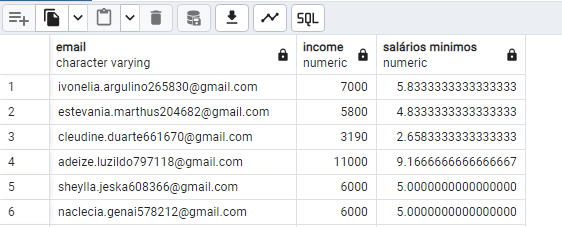

> Conseguimos criar a coluna que nos retorna quantos salarios minimos cada cliente recebe.

**(Exercício 2)** Na query anterior acrescente uma coluna informando TRUE se o cliente ganha acima de 5 salários mínimos e FALSE se ganha 4 salários ou menos.
* Chame a nova coluna de "acima de 4 salários"

**Query:**


```sql
select
	email,
	income,
	(income) / 1200 as "salários mínimos",
	((income) / 1200) > 4 as "acima de 4 salários"
from sales.customers
```



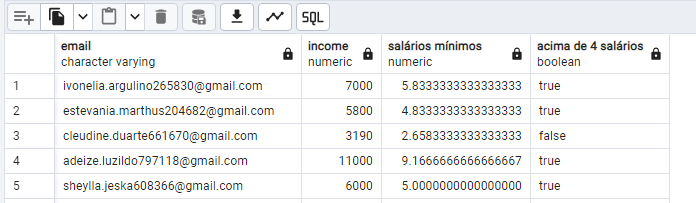

> Conseguimos trazer uma tabela informando se a pessoa recebe mais de 4 salarios minimos.

**(Exercício 3)** Na query anterior filtre apenas os clientes que ganham entre
 4 e 5 salários mínimos. Utilize o comando BETWEEN

**Query:**

```sql
select
    email,
    income,
    (income) / 1200 as "salários mínimos",
    ((income) / 1200) > 4 as "acima de 4 salários"
from sales.customers
where ((income) / 1200) between 4 and 5
```



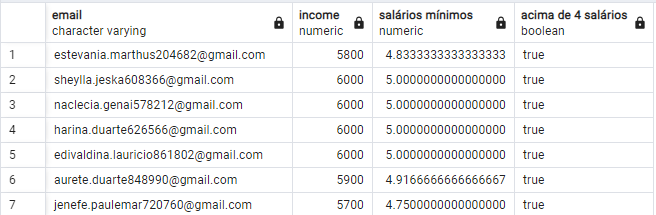

> Esse aqui deu um pouco de trabalho pois eu estava usando `where "salários mínimos"` e retornava que não existe, tive que pesquisar e essa consulta não salva a nova coluna na memoria, ela so gera a query e tchau, por isso a proxima consulta essa coluna gerada não existe.





**(Exercício 4)** Selecine o email, cidade e estado dos clientes que moram no estado de  Minas Gerais e Mato Grosso.

**Query:**

```sql
select email,
	   city,
	   state
from sales.customers
where state in ('MT', 'MG')
```



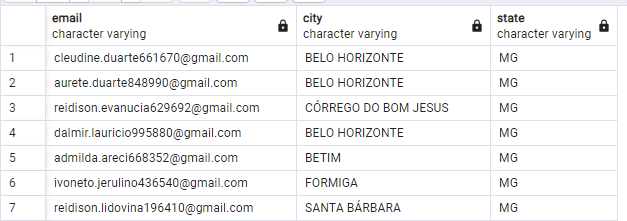

> Essa foi bem tranquila, a clausula `in` facilita de mais.

**(Exercício 5)** Selecine o email, cidade e estado dos clientes que não
moram no estado de São Paulo.

**Query:**

```sql
select email,
	   city,
	   state
from sales.customers
where state not in ('SP')
```



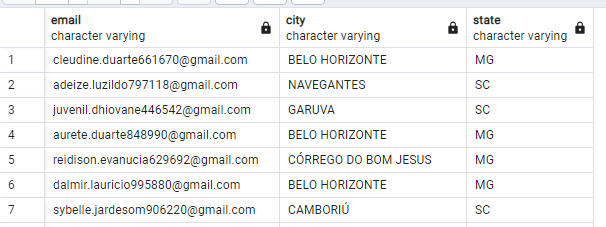

**(Exercício 6)** Selecine os nomes das cidade que começam com a letra Z.
Dados da tabela temp_table.regions

**Query:**

```sql
select city
from temp_tables.regions
where city ilike 'z%'
```



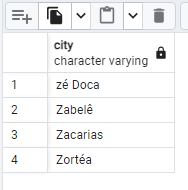

> Utilizei a clausula `ILIKE` por não conhecer o banco de dados.